In [38]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [2]:
data  = pandas.read_csv("data_ransomware.csv")

In [3]:
data

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,VirusShare_0a09a21c2f28c8c5b5d168feb668a80b,0a09a21c2f28c8c5b5d168feb668a80b,332,0,0,0,4,0,0,8520,6,0,2,1048576,0,0,0,0
1,VirusShare_bc4ce1d0466f42493418d65b9a1e880f,bc4ce1d0466f42493418d65b9a1e880f,332,0,0,8,10,369716,160,0,9,0,3,0,0,764,0,0
2,VirusShare_3086d1682a10bca61945ccca93cc8098,3086d1682a10bca61945ccca93cc8098,332,0,0,0,4,0,0,257,2,50,5,1048576,0,227484,0,0
3,VirusShare_0683b586f3b9ea7a06d4d31555f31f80,0683b586f3b9ea7a06d4d31555f31f80,332,0,0,0,5,0,0,245760,9,0,7,1048576,32768,45920,0,0
4,VirusShare_d74daee515bd5a77f299151a568cb57a,d74daee515bd5a77f299151a568cb57a,332,28,12336,0,4,0,0,28672,9,0,8,1048576,0,96304,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35362,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
35363,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
35364,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
35365,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [4]:
data_new = data.loc[:,(data != 0).any(axis = 0)]
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35367 entries, 0 to 35366
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            35367 non-null  object
 1   md5Hash             35367 non-null  object
 2   Machine             35367 non-null  int64 
 3   DebugSize           35367 non-null  int64 
 4   DebugRVA            35367 non-null  int64 
 5   MajorImageVersion   35367 non-null  int64 
 6   MajorOSVersion      35367 non-null  int64 
 7   ExportRVA           35367 non-null  int64 
 8   ExportSize          35367 non-null  int64 
 9   IatVRA              35367 non-null  int64 
 10  MajorLinkerVersion  35367 non-null  int64 
 11  MinorLinkerVersion  35367 non-null  int64 
 12  NumberOfSections    35367 non-null  int64 
 13  SizeOfStackReserve  35367 non-null  int64 
 14  DllCharacteristics  35367 non-null  int64 
 15  ResourceSize        35367 non-null  int64 
 16  BitcoinAddresses    35

In [5]:
x = data_new.iloc[:,:-1].values
y = data_new.iloc[:,-1].values

In [6]:
print(x.shape)

(35367, 16)


In [7]:
print(y.shape)

(35367,)


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31830, 16)
(31830,)
(3537, 16)
(3537,)


In [9]:
x = data_new.iloc[:,2:-1]
x

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize
0,332,0,0,0,4,0,0,8520,6,0,2,1048576,0,0
1,332,0,0,8,10,369716,160,0,9,0,3,0,0,764
2,332,0,0,0,4,0,0,257,2,50,5,1048576,0,227484
3,332,0,0,0,5,0,0,245760,9,0,7,1048576,32768,45920
4,332,28,12336,0,4,0,0,28672,9,0,8,1048576,0,96304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35362,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504
35363,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704
35364,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364
35365,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296


In [10]:
x = data_new.iloc[:, 2:-1].values
y = data_new.iloc[:,-1].values

In [11]:
x

array([[    332,       0,       0, ..., 1048576,       0,       0],
       [    332,       0,       0, ...,       0,       0,     764],
       [    332,       0,       0, ..., 1048576,       0,  227484],
       ...,
       [    332,       0,       0, ..., 1048576,       0,    2364],
       [    332,       0,       0, ..., 1048576,       0,  130296],
       [    332,       0,       0, ..., 1048576,       0,    6912]],
      dtype=int64)

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
classifier = DecisionTreeClassifier()
model = classifier.fit(x_train,y_train)

In [40]:
prediction = model.predict(x_test)
accuracy_score(y_test,prediction)*100

99.08585430213928

<Axes: >

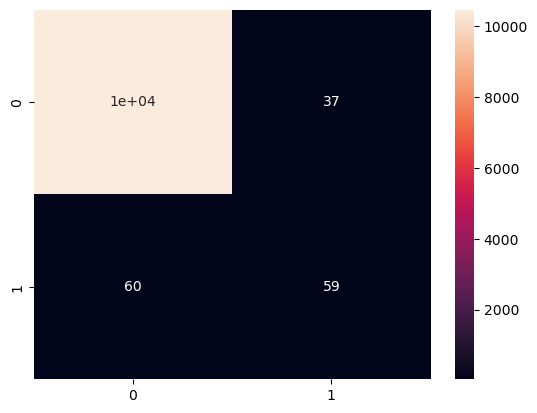

In [41]:
matrix = confusion_matrix(y_test,prediction)
sns.heatmap(matrix,annot=True)

In [42]:
print("False positives:",matrix[0][1]/sum(matrix[0]*100))
print("False negatives:",matrix[1][0]/sum(matrix[1]*100))

False positives: 3.526496378192909e-05
False negatives: 0.005042016806722689


In [43]:
print(metrics.classification_report(y_test,prediction,zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10492
           1       0.61      0.50      0.55       119

    accuracy                           0.99     10611
   macro avg       0.80      0.75      0.77     10611
weighted avg       0.99      0.99      0.99     10611



In [47]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [51]:
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision Tree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [1]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - graphviz


The following NEW packages will be INSTALLED:

  cairo              pkgs/main/win-64::cairo-1.16.0-haedb8bc_5 
  expat              pkgs/main/win-64::expat-2.5.0-hd77b12b_0 
  font-ttf-dejavu-s~ pkgs/main/noarch::font-ttf-dejavu-sans-mono-2.37-hd3eb1b0_0 
  font-ttf-inconsol~ pkgs/main/noarch::font-ttf-inconsolata-2.001-hcb22688_0 
  font-ttf-source-c~ pkgs/main/noarch::font-ttf-source-code-pro-2.030-hd3eb1b0_0 
  font-ttf-ubuntu    pkgs/main/noarch::font-ttf-ubuntu-0.83-h8b1ccd4_0 
  fontconfig         pkgs/main/win-64::fontconfig-2.14.1-h9c4af85_2 
  fonts-anaconda     pkgs/main/noarch::fonts-anaconda-1-h8fa9717_0 
  fonts-conda-ecosy~ pkgs/main/noarch::fonts-conda-ecosystem-1-hd3eb1b0_0 
  fribidi            pkgs/main/win-64::fribidi-1.0.10-h62dcd97_0 
  getopt-win32       pkgs/main/win-64::getopt-win32-0.1-h2bbff1b_0 
  graphite2          pkgs/



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: D:\Anaconda




In [53]:
conda update --update-deps conda

Solving environment: ...working... Solving environment: ...working... done
done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - boltons
    - brotlipy
    - bzip2
    - ca-certificates
    - certifi
    - cffi
    - charset-normalizer
    - colorama
    - conda
    - conda-package-handling
    - conda-package-streaming
    - cryptography
    - idna
    - jsonpatch
    - jsonpointer
    - libffi
    - menuinst
    - openssl
    - packaging
    - pip
    - pluggy
    - pycosat
    - pycparser
    - pyopenssl
    - pysocks
    - python=3.11
    - requests
    - ruamel.yaml
    - setuptools
    - sqlite
    - tk
    - tqdm
    - truststore
    - tzdata
    - urllib3
    - vc
    - vs2015_runtime
    - wheel
    - win_inet_pton
    - xz
    - zlib
    - zstandard


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wheel-0.41.2               |  py311haa95


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: D:\Anaconda


